# Classificação de imagens

In [1]:
# Célula para baixar os dados. Execute apenas uma vez!
from torchvision.datasets.utils import download_and_extract_archive

def download(root):

    url_images = 'https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz'
    url_targets = 'https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz'

    download_and_extract_archive(url_images, root, remove_finished=False)
    download_and_extract_archive(url_targets, root, remove_finished=False)

#download('data')

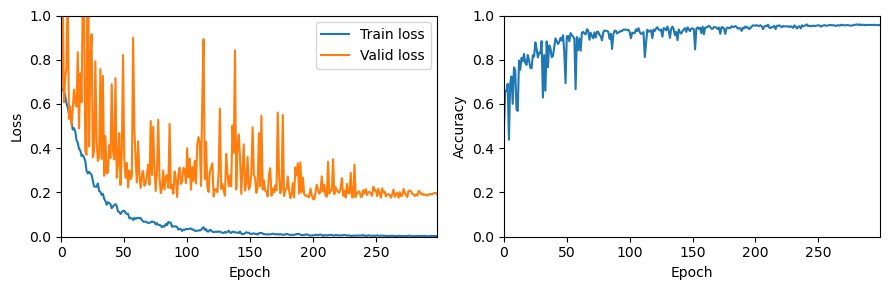

In [1]:
from torch import nn
from torchvision import models
import train

params = {
    'bs':256,
    'num_epochs':300,
    'lr':0.01,
    'weight_decay':1e-3,
    'resize_size':224,  # Tamanho das imagens de treinamento
    'seed':0
}
# usei momentum e tamanho 128
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, 2)
#model = models.efficientnet_b0()
#model.classifier[1] = nn.Linear(1280, 2)
ds_train, ds_valid, logger = train.train(model, **params)

In [ ]:
train.plot_log(logger)

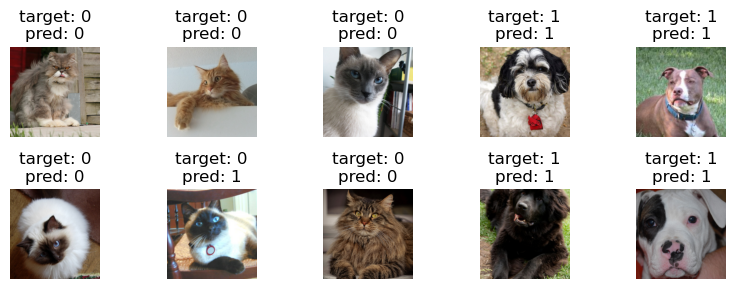

In [17]:
import matplotlib.pyplot as plt
import torch
import dataset

model.eval()
fig, axs = plt.subplots(2, 5, figsize=(8,3))
axs = axs.reshape(-1)
for idx in range(10):
    img, target = ds_valid[idx]
    with torch.no_grad():
        scores = model(img.unsqueeze(0))
        pred = torch.argmax(scores)
    axs[idx].imshow(dataset.unormalize(img))
    axs[idx].set_title(f'target: {target}\npred: {pred}')
    axs[idx].set_axis_off()
plt.tight_layout()

Se necessário, é possível continuar treinando a rede, bastaria fazer:
```python
params = {
    'bs':256,
    'num_epochs':50,   # Treina por mais 50 épocas
    'lr':0.001,        # Learning rate menor do que o treinamento original
    'weight_decay':1e-3,
    'resize_size':224,  
    'seed':1
}

# Carrega pesos do modelo salvo
checkpoint = torch.load('../data/checkpoints/M06/checkpoint.pt')
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(checkpoint['model'])
# Treina mais um pouco.
ds_train, ds_valid, logger = train.train(model, **params)
```

\* Esta célula está em markdown para evitar que o código seja executado